In [1]:
pip install -U imbalanced-learn

In [3]:
import pandas as pd
import numpy as np

#data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning packages
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#from lightgbm import LGBMClassifier

from imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()

#maths
import math

#set the options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [4]:
diab_df = pd.read_csv('diabetes_binary.csv')
diab_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
diab_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [6]:
diab_df['MentHlth'].unique()
#to check the unique values in this column

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1.,  4.,
        7.,  8., 21., 14., 26., 29., 16., 28., 11., 12., 24., 17., 13.,
       27., 19., 22.,  9., 23.])

In [7]:
diab_df.shape

(253680, 22)

In [8]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
for col in diab_df.columns:
    if col != 'BMI':
        diab_df[col] = diab_df[col].astype(int) #this converts the datatype of all the columns in the dataframe except the BMI to integer.

In [10]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int32  
 1   HighBP                253680 non-null  int32  
 2   HighChol              253680 non-null  int32  
 3   CholCheck             253680 non-null  int32  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int32  
 6   Stroke                253680 non-null  int32  
 7   HeartDiseaseorAttack  253680 non-null  int32  
 8   PhysActivity          253680 non-null  int32  
 9   Fruits                253680 non-null  int32  
 10  Veggies               253680 non-null  int32  
 11  HvyAlcoholConsump     253680 non-null  int32  
 12  AnyHealthcare         253680 non-null  int32  
 13  NoDocbcCost           253680 non-null  int32  
 14  GenHlth               253680 non-null  int32  
 15  

<AxesSubplot:>

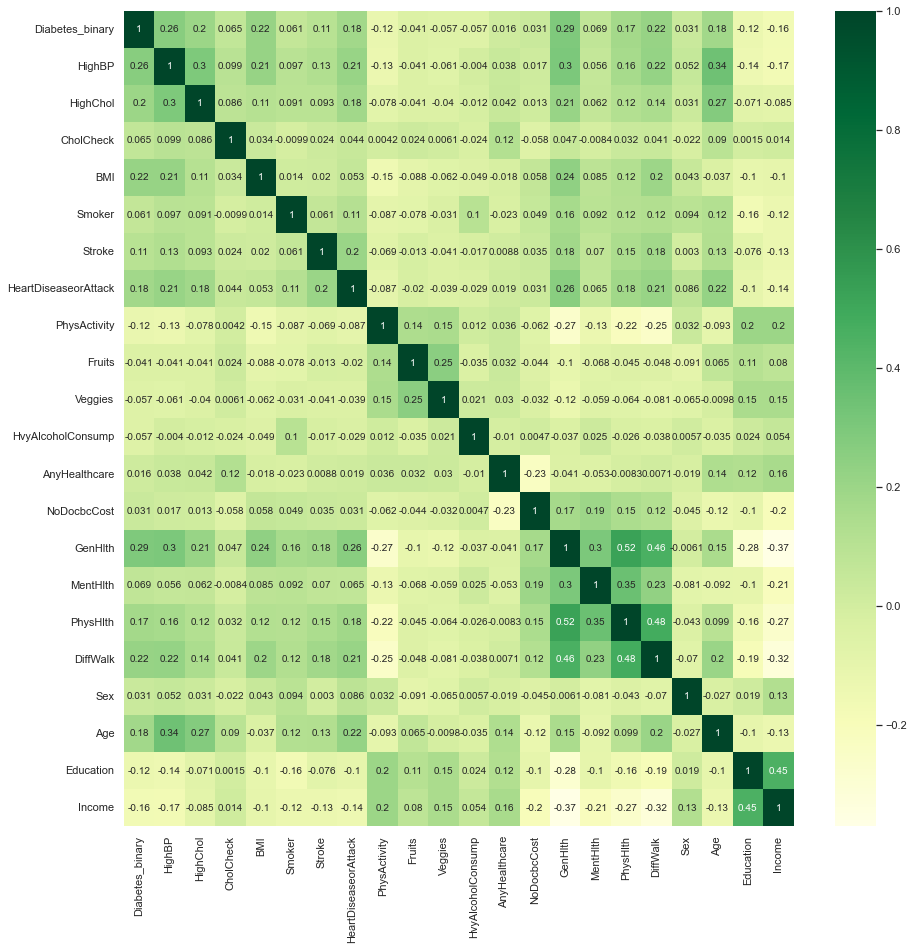

In [11]:
#to check for multicolinaearity
r = diab_df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(r, annot = True, cmap = 'YlGn')

<AxesSubplot:>

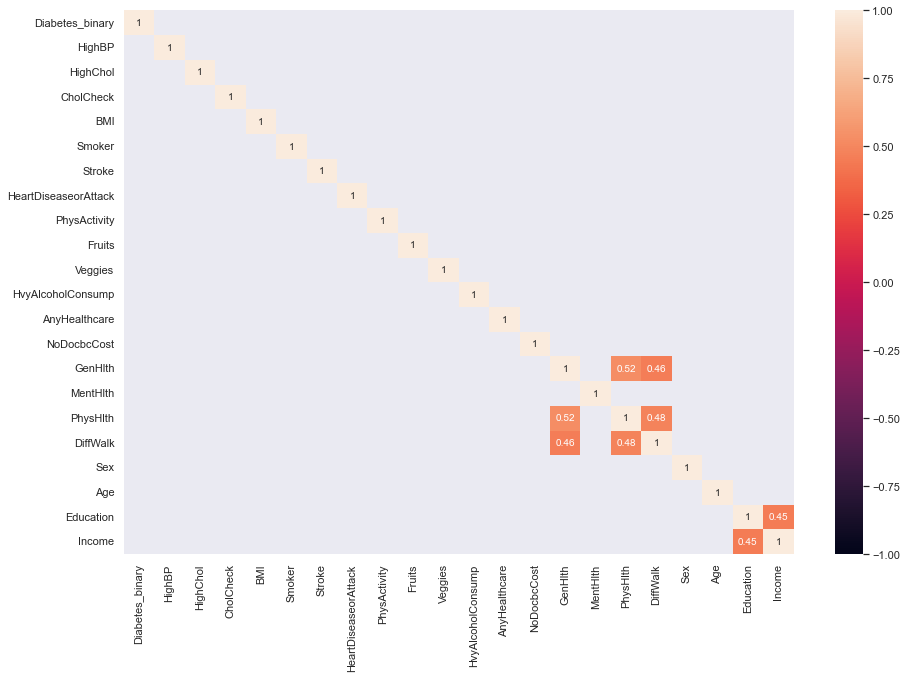

In [15]:
#you can use a mask to filter the map and bring out only the ones higher than the value you assign
mask = r[(r >= 0.4)]
plt.figure(figsize = (15,10))
sns.heatmap(mask, vmin = -1, vmax = 1, annot = True)

<AxesSubplot:>

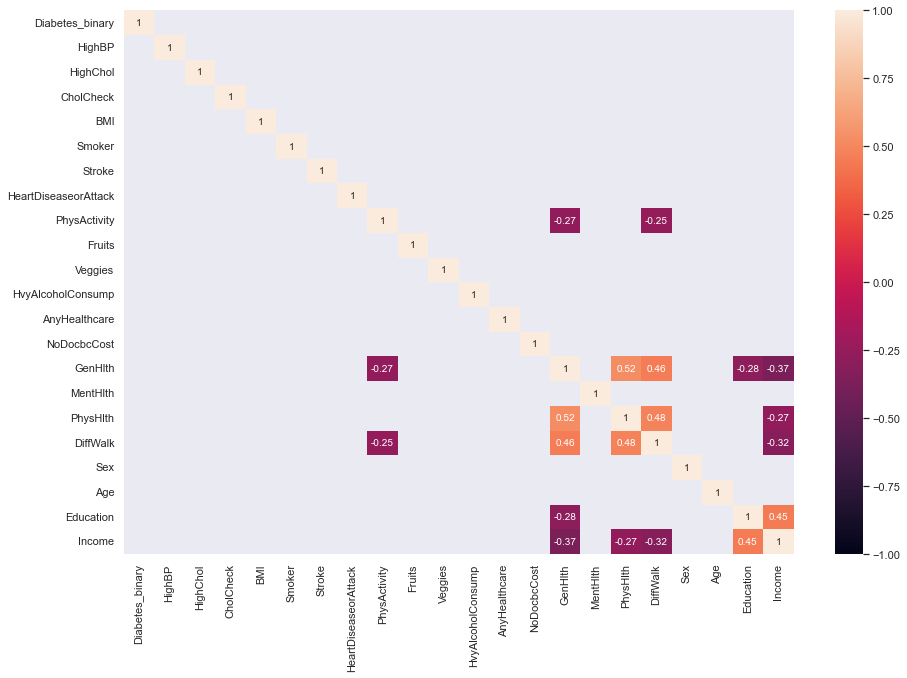

In [16]:
mask = r[(r >= 0.4) | (r <= -0.25)] 
plt.figure(figsize = (15,10))
sns.heatmap(mask, vmin = -1, vmax = 1, annot = True)

In [17]:
scaler = StandardScaler()

features = diab_df.drop('Diabetes_binary', axis = 1) #assign the features to the features variable

target = diab_df['Diabetes_binary']

In [18]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(features, target)

imp = pd.DataFrame(mutual_info_classif(features, target), index = features.columns)

imp.columns = ['Importance']

imp.sort_values(by = 'Importance', ascending = False)

,Importance
GenHlth,0.054564
CholCheck,0.045980
AnyHealthcare,0.043204
HighBP,0.042803
PhysActivity,0.033722
Veggies,0.033096
BMI,0.028963
HighChol,0.027231
Age,0.025222
Income,0.023949


In [19]:
imp1 = imp[imp['Importance']>=0.0245].sort_values(by='Importance', 
                                                  ascending = False)

imp1

,Importance
GenHlth,0.054564
CholCheck,0.045980
AnyHealthcare,0.043204
HighBP,0.042803
PhysActivity,0.033722
Veggies,0.033096
BMI,0.028963
HighChol,0.027231
Age,0.025222


In [ ]:
#Read up on PCA (principle component analysis)

In [20]:
new = imp1.index
new

Index(['GenHlth', 'CholCheck', 'AnyHealthcare', 'HighBP', 'PhysActivity',
       'Veggies', 'BMI', 'HighChol', 'Age'],
      dtype='object')

In [21]:
features[new]

,GenHlth,CholCheck,AnyHealthcare,HighBP,PhysActivity,Veggies,BMI,HighChol,Age
0,5,1,1,1,0,1,40.0,1,9
1,3,0,0,0,1,0,25.0,0,7
2,5,1,1,1,0,0,28.0,1,9
3,2,1,1,1,1,1,27.0,0,11
4,2,1,1,1,1,1,24.0,1,11
...,...,...,...,...,...,...,...,...,...
253675,3,1,1,1,0,1,45.0,1,5
253676,4,1,1,1,0,0,18.0,1,11
253677,1,1,1,0,1,0,28.0,0,2
253678,3,1,1,1,0,1,23.0,0,7


In [22]:
features1 = features[new]

In [23]:
scaler.fit_transform(features1)

array([[ 2.32912057,  0.19692156,  0.22686264, ...,  1.75793567,
         1.16525449,  0.31690008],
       [ 0.45729435, -5.07816412, -4.40795367, ..., -0.51180614,
        -0.85818163, -0.33793279],
       [ 2.32912057,  0.19692156,  0.22686264, ..., -0.05785778,
         1.16525449,  0.31690008],
       ...,
       [-1.41453187,  0.19692156,  0.22686264, ..., -0.05785778,
        -0.85818163, -1.97501498],
       [ 0.45729435,  0.19692156,  0.22686264, ..., -0.81443838,
        -0.85818163, -0.33793279],
       [-0.47861876,  0.19692156,  0.22686264, ..., -0.51180614,
         1.16525449,  0.31690008]])

In [24]:
scaler.fit(features1)

StandardScaler()

In [25]:
scaler.transform(features1)

array([[ 2.32912057,  0.19692156,  0.22686264, ...,  1.75793567,
         1.16525449,  0.31690008],
       [ 0.45729435, -5.07816412, -4.40795367, ..., -0.51180614,
        -0.85818163, -0.33793279],
       [ 2.32912057,  0.19692156,  0.22686264, ..., -0.05785778,
         1.16525449,  0.31690008],
       ...,
       [-1.41453187,  0.19692156,  0.22686264, ..., -0.05785778,
        -0.85818163, -1.97501498],
       [ 0.45729435,  0.19692156,  0.22686264, ..., -0.81443838,
        -0.85818163, -0.33793279],
       [-0.47861876,  0.19692156,  0.22686264, ..., -0.51180614,
         1.16525449,  0.31690008]])

In [37]:
from sklearn.decomposition import PCA

In [38]:
#It is not advised to scale the whole data, divide into train and test before you scale.

In [39]:
features2 = features[new]

In [40]:
features_train, features_test, target_train, target_test = train_test_split(features2, target, test_size = 0.3, random_state = 123)

In [41]:
scaler.fit(features_train)

StandardScaler()

In [42]:
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components = 5)
pca.fit(features_train)
data_pca_train = pca.transform(features_train)

data_pca_train2 = pd.DataFrame(data_pca_train, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
data_pca_train2.head()

,PC1,PC2,PC3,PC4,PC5
0,0.559439,1.977648,1.876430,2.181317,-2.473099
1,-2.407442,-0.131706,-0.725238,0.335340,-0.037370
2,-0.225077,-0.910963,0.195131,0.341806,-0.151484
3,-0.341387,-0.491853,-0.142646,0.760819,-0.070317
4,0.097848,-1.678234,0.767244,-0.502765,-0.076655


In [ ]:
data_pca_test = pca.transform(features_test)

In [ ]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LR':
        model = LogisticRegression()
    return model

In [ ]:
model = model_to_use('LR')
model

In [ ]:
model.fit(data_pca_train, target_train)
model

In [ ]:
target_predict = model.predict(data_pca_test)

#Predict probability for test dataset
target_predict_prob = model.predict_proba(data_pca_test)
target_predict_prob = [x[1] for x in target_predict_prob]
print("target predicted : ", target_predict)
print("Y probability predicted : ", target_predict_prob[:5])

In [ ]:
pd.DataFrame({'pred': target_predict, 'prob': target_predict_prob})

In [ ]:
def compute_evaluation_metric(model, data_pca_test, target_test, target_predict, target_predict_prob):
    print('\n Accuracy Score: \n', accuracy_score(target_test, target_predict))
    print('\n AUC score: \n', roc_auc_score(target_test, target_predict))
    print('\n Confusion Matrix: \n', confusion_matrix(target_test, target_predict))
    print('\n Classification Report: \n', classification_report(target_test, target_predict))
    
    print('\n ROC curve: \n')
    sns.set_style('white')
    plot_roc_curve(model, data_pca_test, target_test)
    plt.show()

In [ ]:
compute_evaluation_metric(model, data_pca_test, target_test, target_predict, target_predict_prob)

In [ ]:
ros = RandomOverSampler()

In [ ]:
features_ros, target_ros = ros.fit_resample(data_pca_train, target_train)
target_ros.value_counts()

In [ ]:
model.fit(features_ros, target_ros)
model

In [ ]:
target_predict = model.predict(data_pca_test)

#Predict probability for test dataset
target_predict_prob = model.predict_proba(data_pca_test)
target_predict_prob = [x[1] for x in target_predict_prob]
print("target predicted : ", target_predict)
print("Y probability predicted : ", target_predict_prob[:5])

In [ ]:
pd.DataFrame({'pred': target_predict, 'prob': target_predict_prob})

In [ ]:
def compute_evaluation_metric(model, data_pca_test, target_test, target_predict, target_predict_prob):
    print('\n Accuracy Score: \n', accuracy_score(target_test, target_predict))
    print('\n AUC score: \n', roc_auc_score(target_test, target_predict))
    print('\n Confusion Matrix: \n', confusion_matrix(target_test, target_predict))
    print('\n Classification Report: \n', classification_report(target_test, target_predict))
    
    print('\n ROC curve: \n')
    sns.set_style('white')
    plot_roc_curve(model, data_pca_test, target_test)
    plt.show()

In [ ]:
compute_evaluation_metric(model, data_pca_test, target_test, target_predict, target_predict_prob)